#Extracting the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/US_Accidents_Dec21_updated.csv")
df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


# Summary of the Dataset

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

There are 47 columns in the dataset.

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
df.shape

(2845342, 47)

In [ ]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

Summary of each attribute

In [ ]:
df.info(null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     2845342 non-null  object 
 1   Severity               2845342 non-null  int64  
 2   Start_Time             2845342 non-null  object 
 3   End_Time               2845342 non-null  object 
 4   Start_Lat              2845342 non-null  float64
 5   Start_Lng              2845342 non-null  float64
 6   End_Lat                2845342 non-null  float64
 7   End_Lng                2845342 non-null  float64
 8   Distance(mi)           2845342 non-null  float64
 9   Description            2845342 non-null  object 
 10  Number                 1101431 non-null  float64
 11  Street                 2845340 non-null  object 
 12  Side                   2845342 non-null  object 
 13  City                   2845205 non-null  object 
 14  County            

# Exploratory Data Analysis

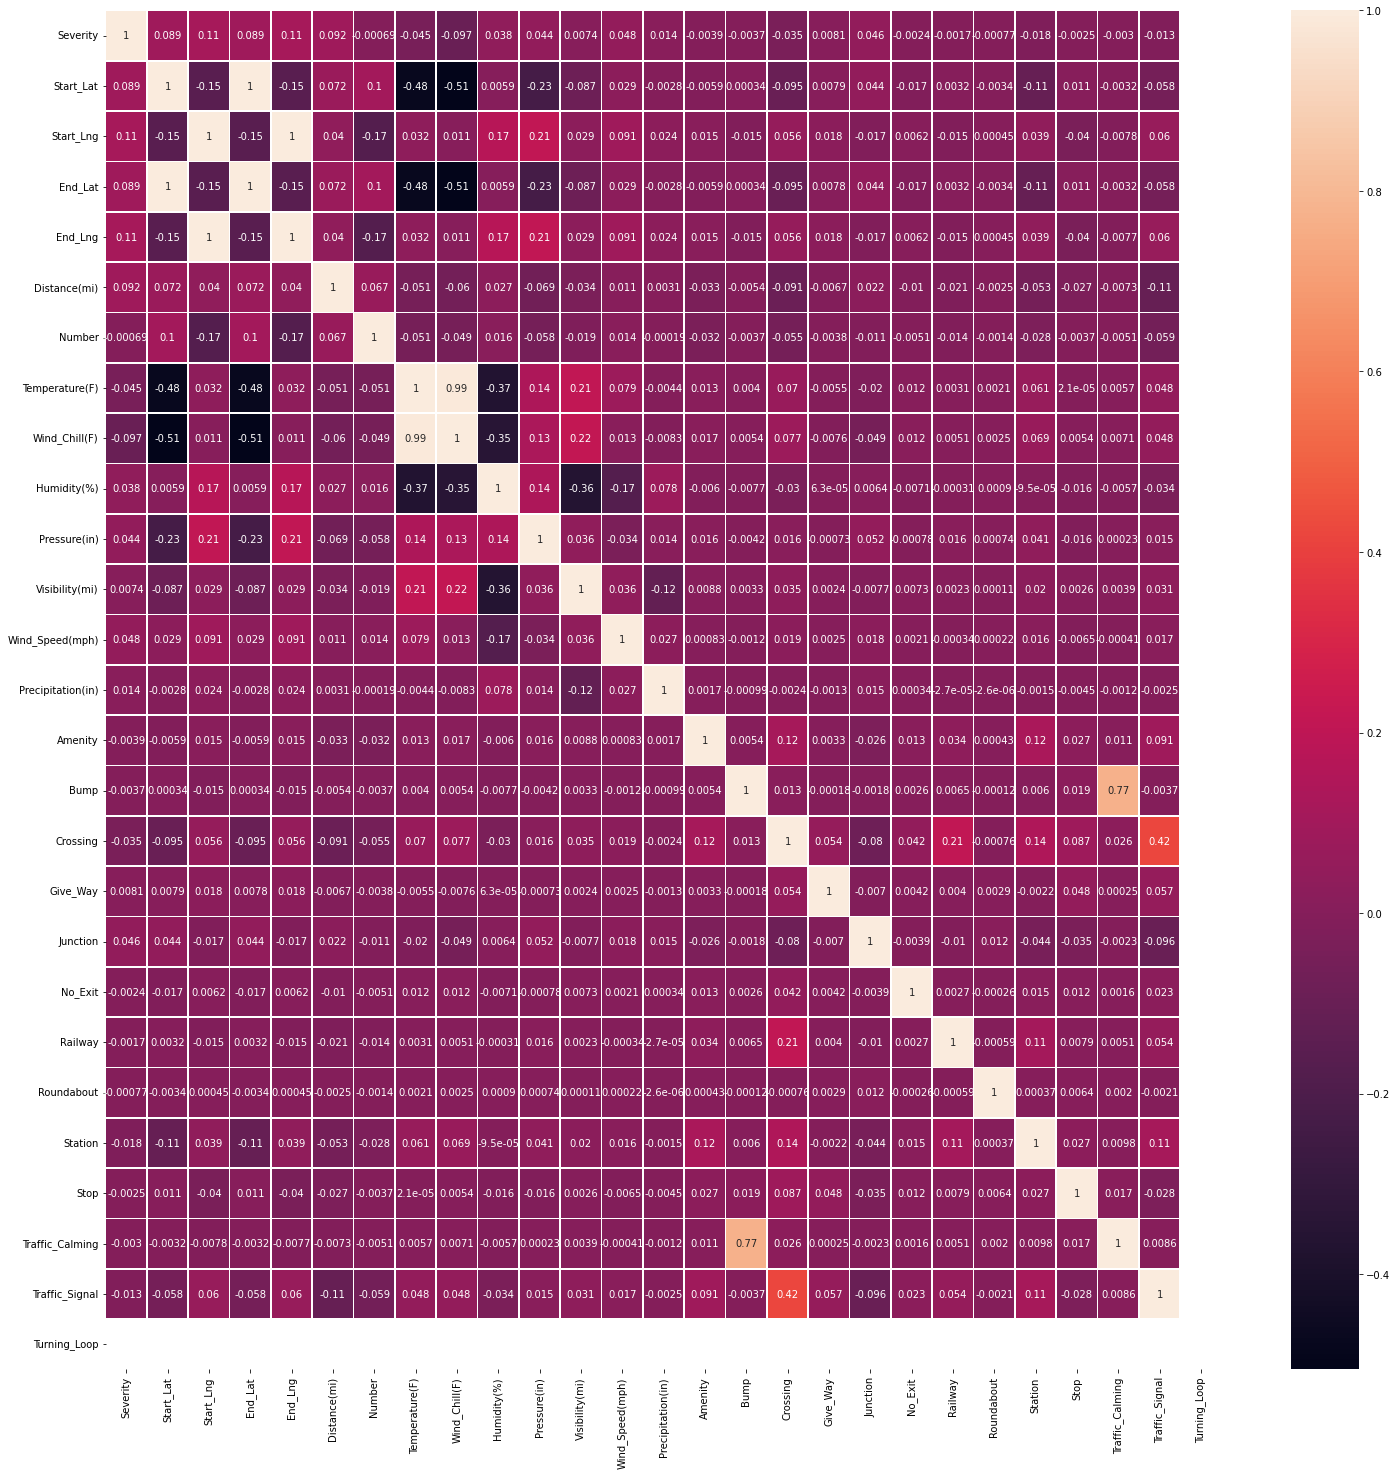

In [ ]:
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(df.corr(),annot=True, linewidths=.5, ax=ax)

### List of Correlated Attributes

*   Bump with Traffic_Calming (0.77)
*   Traffic_Signal with Distance (-0.11)
*   Pressure with Latitude and Longitude (-0.23 and 0.21)
*   Traffic_Signal with Crossing (0.42)
*   Temperature with Humidity (-0.37)
*   Percipitation with Visibility (-0.12)



In [ ]:
import plotly.express as px
city=df["City"]
#Preparing data for Geographical plotting
data_update = df.groupby('State').count()
data_update['Cases'] = data_update['Severity']
data_update['Percentage'] = (data_update['Severity'] /2845342) * 100
# data_update['Percentage']

fig = px.choropleth( data_update,
                     locations = data_update.index,
                     locationmode = 'USA-states',
                     scope = 'usa',
                     color = 'Cases',
                     title = 'US Accidents',
                     hover_name = data_update.index,
                     hover_data = ['Cases','Percentage'],
                     range_color = [1,800000],
                     color_continuous_scale = 'earth')

fig.show()


1) California has recorded the highest number of accidental cases over the span of five years.

2) Florida at second position in total no of accidental cases, which along with California accounts for almost 42% of total number of cases in the United States.

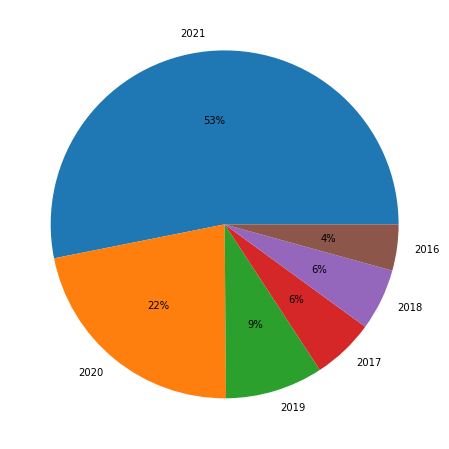

In [ ]:
df['Start_Time']= pd.to_datetime(df.Start_Time)
df['Start_Time'].dtype
df['year'] = df['Start_Time'].dt.year
df_years = df.groupby('year',as_index=False).size()
df_years_sorted = df_years.sort_values('size',ascending=False)
df_years_sorted["Percentage of Cases"] = (df_years_sorted['size']/df_years_sorted['size'].sum())*100 
fig, ax = plt.subplots(figsize=(10,8))
plt.pie(df_years_sorted["Percentage of Cases"],labels=df_years_sorted["year"], autopct='%.0f%%')
plt.show()



3) Majority of Cases in US (53%) were reported in 2021 only.

4)Between the years 2016 and 2019 the growth in number of accidental cases was increasing marginally. However, in the years 2020 and 2021, it escalated at very high rate comparatively.

In [ ]:
df['month'] = df['Start_Time'].dt.month
df_month = df.groupby('month',as_index=False).count()
fig = px.bar(df_month, x='month', y='Severity', height=400,labels=dict(size="No of Cases"))
fig.show()

5) The month of December accounts for the highest number of accidents annually.

6) In the first half of every year, the number of cases remains stagnant, whereas it increases steadily in another half of the year.

In [ ]:
df['hour'] = df['Start_Time'].dt.hour
df_hour = df.groupby('hour',as_index=False).size()
df_hour_sorted = df_hour.sort_values('size',ascending=False)
fig = px.bar(df_hour_sorted, x='hour', y='size', height=400,labels=dict(size="No of Cases"))
fig.show()

7) From the above bargraph, there is a high probability that if an accident occurred, it would be between 12:00 hours and 18:00 hours of the day.

8) Frequency of accidents reaches a pinnacle of 220k at 17:00 hours of the day. 

In [ ]:
df_severity_again = df.groupby('Severity',as_index=False).size()
df_severity_again_sorted = df_severity_again.sort_values('size',ascending=False)
fig1 = px.bar(df_severity_again_sorted, x='Severity', y='size', height=400,labels=dict(size="No of Cases"))
fig1.show()

9) Almost 90 percent of accident cases (2.53M)  are of class 2 Severity. 
(It implies that there is a class imbalance in the given data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



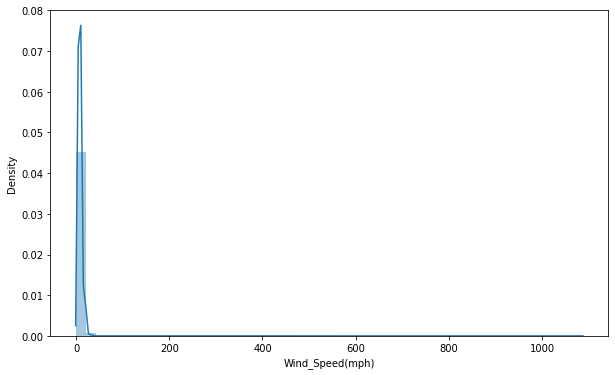

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.distplot(df["Wind_Speed(mph)"])

10) From the above density plot, it can be deduced that approximately 99% of Wind_speed values lie nearby 0, and there are some outliers whose values are above 300 mph.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



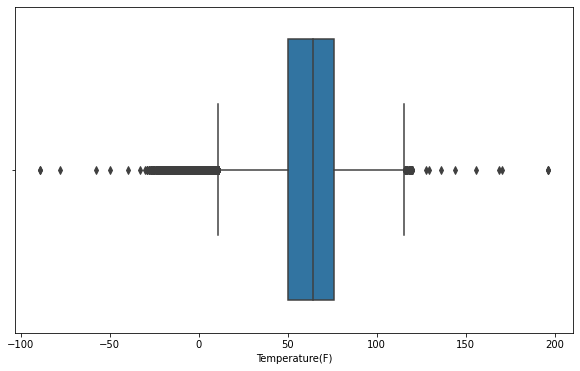

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.boxplot(df["Temperature(F)"])

11) Most of the Temperature(F) values lie between 50F-100F, with the median around 60F. However, there are a significant amount of outliers in this attribute.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



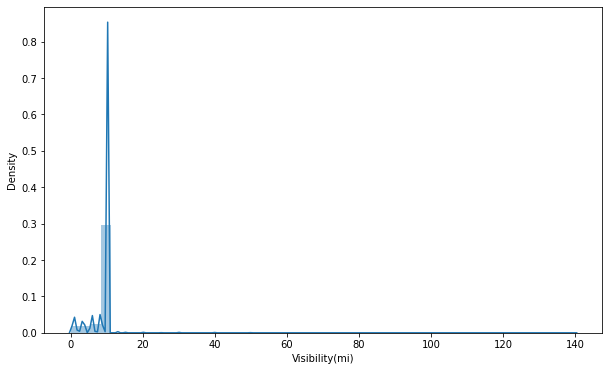

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.distplot(df["Visibility(mi)"])



12) Vast amount of data points of the Visibility(mi) attribute is concentrated at 10, whereas most data points are between 0 and 20.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



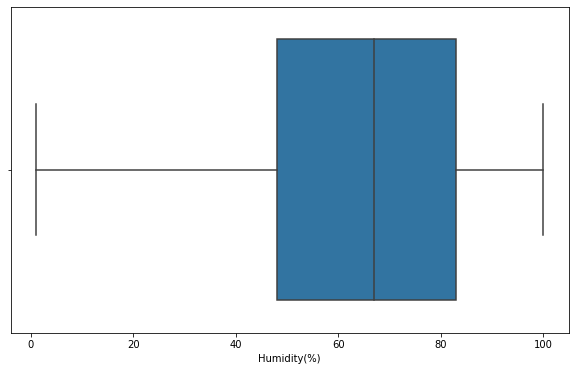

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) 
sns.boxplot(df["Humidity(%)"])

13) In most accident cases, the Humidity attribute value is likely between 50 and 85. The median of this attribute is nearby 65.

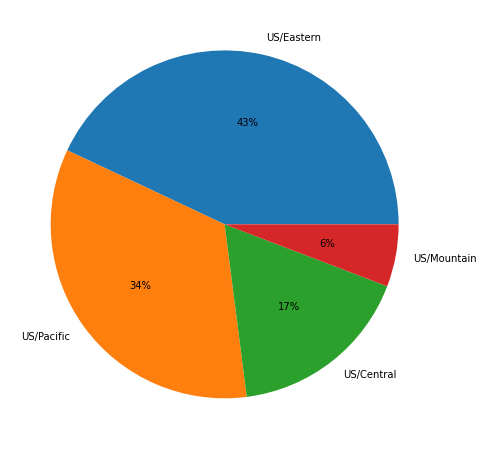

In [ ]:
df_timezone = df.groupby('Timezone',as_index=False).size()
df_timezone_sorted = df_timezone.sort_values('size',ascending=False)
df_timezone_sorted["Percentage"]= df_timezone_sorted["size"]/df_timezone_sorted["size"].sum() 
fig, ax = plt.subplots(figsize=(10,8)) 
plt.pie(df_timezone_sorted["Percentage"],labels=df_timezone_sorted['Timezone'],autopct='%.0f%%')
plt.show()

14) In case of accidents in the US during 2016-2021, there is a very high chance that it has occurred either in US/Eastern or in US/Pacific timezone. However, there is a minute probability that it has occurred in US/Mountain timezone.    

In [ ]:
df_weather_condition = df.groupby('Weather_Condition',as_index=False).size()
df_weather_condition
df_weather_condition_sorted = df_weather_condition.sort_values('size',ascending=False)
fig = px.bar(df_weather_condition_sorted, x='Weather_Condition', y='size', height=400,labels=dict(size="No of Cases"))
fig.show()

15) The number of accident cases during fair weather conditions outweighs all other weather conditions with a count of 1.1 M, followed by mostly cloudy and cloudy with 363.9k and 348.76k, respectively. 

In [ ]:
import plotly.graph_objects as go

df_sunrise = df.groupby('Sunrise_Sunset', as_index=False).size()
df_sunrise
df_astronomical_twilight = df.groupby('Astronomical_Twilight', as_index=False).size()
df_astronomical_twilight
df_Civil_Twilight = df.groupby('Civil_Twilight', as_index=False).size()
df_Civil_Twilight
df_Nautical_Twilight = df.groupby('Nautical_Twilight', as_index=False).size()
df_Nautical_Twilight

fig1 = px.bar(df_sunrise, x='Sunrise_Sunset', y='size',color="size")
fig2 = px.bar(df_astronomical_twilight, x='Astronomical_Twilight', y='size',color="size")
fig3 = px.bar(df_Civil_Twilight, x='Civil_Twilight', y='size',color="size")
fig4 = px.bar(df_Nautical_Twilight, x='Nautical_Twilight', y='size',color="size")

fig = go.Figure(data= fig1.data + fig2.data + fig3.data + fig4.data)
fig.show()

16) In the attributes Sunrise_sunset, Astronomical_Twilight, Civil_Twilight and Nautical_Twilight the count of attribute value "day" out shadows "Night."




    Bump     size  Percentage
0  False  2844321    0.999641
1   True     1021    0.000359


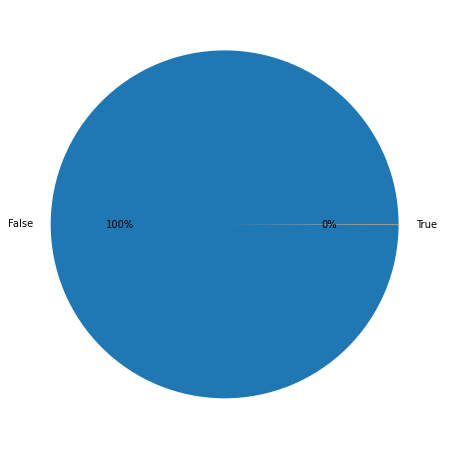

In [ ]:
df_bump = df.groupby("Bump",as_index=False).size()
df_bump["Percentage"]= df_bump["size"]/df_bump["size"].sum() 
print(df_bump)

fig, ax = plt.subplots(figsize=(10,8)) 
plt.pie(df_bump["Percentage"],labels=df_bump['Bump'],autopct='%.f%%')
plt.show()

   Crossing     size  Percentage
0     False  2645130    0.929635
1      True   200212    0.070365


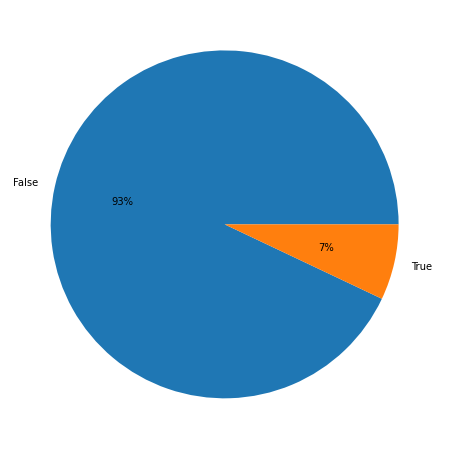

In [ ]:
df_crossing = df.groupby("Crossing",as_index=False).size()
df_crossing["Percentage"]= df_crossing["size"]/df_crossing["size"].sum() 
print(df_crossing)

fig, ax = plt.subplots(figsize=(10,8)) 
plt.pie(df_crossing["Percentage"],labels=df_crossing['Crossing'],autopct='%.f%%')
plt.show()

17) From the above two pie charts, in most of the accident cases nearby crossing, the bumps were not there to prevent accidents. Therefore, the US Government can install bumps near crossings to prevent accidents nearby.

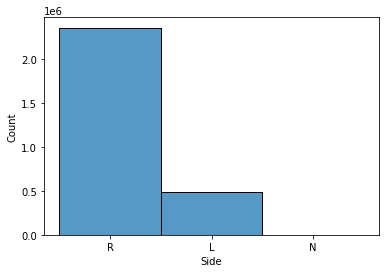

In [ ]:
sns.histplot(df["Side"])

18) Majority of accidents occur on the right side.

# Data Preprocessing

### Checking for null values

In [ ]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

Dropping Attributes that are irrelavant or have significantly high number of null values 

In [ ]:
df.drop(["Number","Precipitation(in)","Country","Zipcode","Airport_Code","Street",'Description','Wind_Chill(F)','Wind_Speed(mph)',"Weather_Timestamp","Wind_Direction","Weather_Condition","Start_Time","End_Time",
"Start_Lat","End_Lat","Start_Lng","End_Lng","Turning_Loop"],axis=1,inplace=True)


Reasons for dropping the attributes
* High number of Null values:- Wind_Speed(mph), Percipitation(in), Wind_Chill, Number
* Irrelavant Information :- Weather_Timestamp`, Wind_Direction (too many unique values), Airport_Code, Longitude/Latitude, Description, Zipcode 
* One Unique Value- Country (US), Turning_loop (False)

In [ ]:
df.isnull().sum()

ID                           0
Severity                     0
Distance(mi)                 0
Side                         0
City                       137
County                       0
State                        0
Timezone                  3659
Temperature(F)           69274
Humidity(%)              73092
Pressure(in)             59200
Visibility(mi)           70546
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Sunrise_Sunset            2867
Civil_Twilight            2867
Nautical_Twilight         2867
Astronomical_Twilight     2867
year                         0
month                        0
hour                         0
dtype: int64

### Filling the missing values 

In [ ]:
df['Nautical_Twilight'].value_counts()

Day      2063472
Night     779003
Name: Nautical_Twilight, dtype: int64

In [ ]:
df['Astronomical_Twilight'].value_counts()

Day      2176983
Night     665492
Name: Astronomical_Twilight, dtype: int64

In [ ]:
df['Civil_Twilight'].value_counts()

Day      1929103
Night     913372
Name: Civil_Twilight, dtype: int64

In [ ]:
df['Sunrise_Sunset'].value_counts()

Day      1811935
Night    1030540
Name: Sunrise_Sunset, dtype: int64

In [ ]:
df['Visibility(mi)'].value_counts()

10.0    2230276
7.0       79649
9.0       68817
8.0       55955
5.0       53933
         ...   
6.2           1
63.0          1
43.0          1
36.0          1
19.0          1
Name: Visibility(mi), Length: 76, dtype: int64

In [ ]:
df['Pressure(in)'].value_counts()

29.96    43668
29.94    43165
29.99    42978
30.01    41736
30.03    41477
         ...  
20.15        1
19.48        1
21.84        1
56.54        1
21.83        1
Name: Pressure(in), Length: 1068, dtype: int64

In [ ]:
df['Temperature(F)'].value_counts()

 73.0     64505
 77.0     63575
 75.0     60534
 72.0     59681
 68.0     58557
          ...  
 109.8        1
-9.8          1
 170.6        1
 107.2        1
 99.1         1
Name: Temperature(F), Length: 788, dtype: int64

In [ ]:

H_med=df["Humidity(%)"].median()
H_med

67.0

In [ ]:
Temp_mean = df["Temperature(F)"].mean()
Temp_mean

61.793555921540836

In [ ]:
df["Nautical_Twilight"] = df["Nautical_Twilight"].fillna('Day')
df["Sunrise_Sunset"] = df["Sunrise_Sunset"].fillna('Day')
df["Astronomical_Twilight"] = df["Astronomical_Twilight"].fillna('Day')
df["Civil_Twilight"] = df["Civil_Twilight"].fillna('Day')
df["Visibility(mi)"] = df["Visibility(mi)"].fillna(10)
df["Pressure(in)"] = df["Pressure(in)"].fillna(30)
df["Humidity(%)"] = df["Humidity(%)"].fillna(H_med)
df["Temperature(F)"]=df["Temperature(F)"].fillna(Temp_mean)


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

ID                       0
Severity                 0
Distance(mi)             0
Side                     0
City                     0
County                   0
State                    0
Timezone                 0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
year                     0
month                    0
hour                     0
dtype: int64

#Binning the Attributes

In [ ]:
df['Timezone'].value_counts()

US/Eastern     1221807
US/Pacific      967084
US/Central      488060
US/Mountain     164595
Name: Timezone, dtype: int64

In [ ]:
df['Side'].value_counts()


R    2350231
L     491315
Name: Side, dtype: int64

In [ ]:
df.drop(df.index[(df["Side"] == "N")],axis=0,inplace=True)


In [ ]:
bins1 = [-1,5,10,160]
labels1 = ["0-5",'5-10','10+']
distance = pd.cut(df['Distance(mi)'],bins=bins1,labels=labels1) 
distance_df = pd.get_dummies(distance, prefix='Distance')
distance_df

,Distance_0-5,Distance_5-10,Distance_10+
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2845337,1,0,0
2845338,1,0,0
2845339,1,0,0
2845340,1,0,0


In [ ]:
timezone_df = pd.get_dummies(df['Timezone'], prefix='Timezone')
severity_df = pd.get_dummies(df['Severity'], prefix='Severity')
sunrise_sunset_df =pd.get_dummies(df["Sunrise_Sunset"], prefix='Sunrise_Sunset')
Civil_Twilight_df =pd.get_dummies(df["Civil_Twilight"], prefix='Civil_Twilight')
Astronomical_Twilight_df =pd.get_dummies(df["Astronomical_Twilight"], prefix='Astronomical_Twilight')
Nautical_Twilight_df =pd.get_dummies(df["Nautical_Twilight"], prefix='Nautical_Twilight')
Side=pd.get_dummies(df["Side"],prefix='Side')

In [ ]:
df.dtypes

ID                        object
Severity                   int64
Distance(mi)             float64
Side                      object
City                      object
County                    object
State                     object
Timezone                  object
Temperature(F)           float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway                     bool
Roundabout                  bool
Station                     bool
Stop                        bool
Traffic_Calming             bool
Traffic_Signal              bool
Sunrise_Sunset            object
Civil_Twilight            object
Nautical_Twilight         object
Astronomical_Twilight     object
year                       int64
month                      int64
hour      

In [ ]:
apriori_df=df.iloc[:,12:24]
apriori_df = apriori_df.join(severity_df)
apriori_df = apriori_df.join(distance_df)
apriori_df = apriori_df.join(timezone_df)
apriori_df = apriori_df.join(sunrise_sunset_df)
apriori_df = apriori_df.join(Civil_Twilight_df)
apriori_df = apriori_df.join(Astronomical_Twilight_df)
apriori_df = apriori_df.join(Nautical_Twilight_df)



In [ ]:
apriori_df.dtypes

Amenity                         bool
Bump                            bool
Crossing                        bool
Give_Way                        bool
Junction                        bool
No_Exit                         bool
Railway                         bool
Roundabout                      bool
Station                         bool
Stop                            bool
Traffic_Calming                 bool
Traffic_Signal                  bool
Severity_1                     uint8
Severity_2                     uint8
Severity_3                     uint8
Severity_4                     uint8
Distance_0-5                   uint8
Distance_5-10                  uint8
Distance_10+                   uint8
Timezone_US/Central            uint8
Timezone_US/Eastern            uint8
Timezone_US/Mountain           uint8
Timezone_US/Pacific            uint8
Sunrise_Sunset_Day             uint8
Sunrise_Sunset_Night           uint8
Civil_Twilight_Day             uint8
Civil_Twilight_Night           uint8
A

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
apriori_df[list(apriori_df.columns)] = apriori_df[list(apriori_df.columns)].apply(lbl_enc.fit_transform)

In [ ]:
apriori_df

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,...,Timezone_US/Mountain,Timezone_US/Pacific,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
2845338,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
2845339,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
2845340,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [ ]:
apriori_df.dtypes

Amenity                        int64
Bump                           int64
Crossing                       int64
Give_Way                       int64
Junction                       int64
No_Exit                        int64
Railway                        int64
Roundabout                     int64
Station                        int64
Stop                           int64
Traffic_Calming                int64
Traffic_Signal                 int64
Severity_1                     int64
Severity_2                     int64
Severity_3                     int64
Severity_4                     int64
Distance_0-5                   int64
Distance_5-10                  int64
Distance_10+                   int64
Timezone_US/Central            int64
Timezone_US/Eastern            int64
Timezone_US/Mountain           int64
Timezone_US/Pacific            int64
Sunrise_Sunset_Day             int64
Sunrise_Sunset_Night           int64
Civil_Twilight_Day             int64
Civil_Twilight_Night           int64
A

# Implementing Apriori Algorithm 

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

####Frequent Item sets for min sup = 0.01, 

In [ ]:
frequent_itemsets = apriori(apriori_df, min_support = 0.01, use_colnames = True)
frequent_itemsets.to_csv("f1.csv")
frequent_itemsets

,support,itemsets
0,0.070436,(Crossing)
1,0.102164,(Junction)
2,0.023926,(Station)
3,0.017715,(Stop)
4,0.093273,(Traffic_Signal)
...,...,...
2241,0.022389,"(Sunrise_Sunset_Day, Timezone_US/Pacific, Naut..."
2242,0.010171,"(Sunrise_Sunset_Day, Nautical_Twilight_Day, As..."
2243,0.027135,"(Sunrise_Sunset_Day, Nautical_Twilight_Day, As..."
2244,0.012266,"(Sunrise_Sunset_Day, Timezone_US/Pacific, Naut..."



[a] {'Sunrise_Sunset_Day', 'Astronomical_Twilight_Day', 'Crossing', 'Civil_Twilight_Day', 'Distance_0-5', 'Timezone_US/Eastern', 'Traffic_Signal', 'Severity_2'},

[b] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Crossing', 'Civil_Twilight_Day', 'Distance_0-5', 'Timezone_US/Eastern', 'Traffic_Signal', 'Severity_2'}

[c] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Crossing', 'Distance_0-5', 'Timezone_US/Eastern', 'Traffic_Signal', 'Severity_2'}, 

[d] {'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Crossing', 'Civil_Twilight_Day', 'Distance_0-5', 'Timezone_US/Eastern', 'Traffic_Signal', 'Severity_2'},

[e] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Crossing', 'Civil_Twilight_Day', 'Distance_0-5', 'Traffic_Signal', 'Severity_2'}, 

[f] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Crossing', 'Civil_Twilight_Day', 'Timezone_US/Eastern', 'Traffic_Signal', 'Severity_2'}, 

[g] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Crossing', 'Civil_Twilight_Day', 'Distance_0-5', 'Timezone_US/Eastern', 'Traffic_Signal'}, 

[h] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Crossing', 'Civil_Twilight_Day', 'Distance_0-5', 'Timezone_US/Eastern', 'Severity_2'}, 

[i] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Junction', 'Distance_0-5', 'Timezone_US/Eastern', 'Severity_2'}, 

[j] {'Sunrise_Sunset_Day', 'Timezone_US/Pacific', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Junction', 'Distance_0-5', 'Severity_2'}, 

[k] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Distance_0-5', 'Timezone_US/Eastern', 'Station', 'Severity_2'}, 

[l] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Distance_0-5', 'Timezone_US/Eastern', 'Traffic_Signal', 'Severity_2'},

[m] {'Sunrise_Sunset_Day', 'Timezone_US/Pacific', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Distance_0-5', 'Traffic_Signal', 'Severity_2'},

[n] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Crossing', 'Civil_Twilight_Day', 'Distance_0-5', 'Timezone_US/Eastern', 'Traffic_Signal', 'Severity_2'}


####Frequent Item sets for min sup = 0.02, 

In [ ]:
frequent_itemsets2 = apriori(apriori_df, min_support = 0.02, use_colnames = True)
frequent_itemsets2.to_csv("f2.csv")
frequent_itemsets2

,support,itemsets
0,0.070436,(Crossing)
1,0.102164,(Junction)
2,0.023926,(Station)
3,0.093273,(Traffic_Signal)
4,0.890182,(Severity_2)
...,...,...
1353,0.020314,"(Sunrise_Sunset_Day, Nautical_Twilight_Day, As..."
1354,0.024364,"(Sunrise_Sunset_Day, Nautical_Twilight_Day, As..."
1355,0.020066,"(Sunrise_Sunset_Day, Nautical_Twilight_Day, As..."
1356,0.022389,"(Sunrise_Sunset_Day, Timezone_US/Pacific, Naut..."


[a] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Crossing', 'Civil_Twilight_Day', 'Distance_0-5', 'Traffic_Signal', 'Severity_2'},

[b] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Crossing', 'Civil_Twilight_Day', 'Distance_0-5', 'Timezone_US/Eastern', 'Severity_2'},

[c] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Junction', 'Distance_0-5', 'Timezone_US/Eastern', 'Severity_2'},

[d] {'Sunrise_Sunset_Day', 'Timezone_US/Pacific', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Junction', 'Distance_0-5', 'Severity_2'},

[e] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Distance_0-5', 'Timezone_US/Eastern', 'Traffic_Signal', 'Severity_2'}

####Frequent Item sets for min sup = 0.05, 

In [ ]:
frequent_itemsets3 = apriori(apriori_df, min_support = 0.05, use_colnames = True)
frequent_itemsets3.to_csv("f3.csv")
frequent_itemsets3


,support,itemsets
0,0.070436,(Crossing)
1,0.102164,(Junction)
2,0.093273,(Traffic_Signal)
3,0.890182,(Severity_2)
4,0.054540,(Severity_3)
...,...,...
608,0.088387,"(Sunrise_Sunset_Day, Timezone_US/Central, Naut..."
609,0.243024,"(Sunrise_Sunset_Day, Nautical_Twilight_Day, As..."
610,0.083564,"(Sunrise_Sunset_Night, Astronomical_Twilight_N..."
611,0.197035,"(Sunrise_Sunset_Day, Timezone_US/Pacific, Naut..."


[a] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Junction', 'Distance_0-5', 'Severity_2'}

[b] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Distance_0-5', 'Traffic_Signal', 'Severity_2'},

[c] {'Sunrise_Sunset_Day', 'Timezone_US/Central', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Distance_0-5', 'Severity_2'}

[d] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Distance_0-5', 'Timezone_US/Eastern', 'Severity_2'},

[e] {'Sunrise_Sunset_Night', 'Astronomical_Twilight_Night', 'Nautical_Twilight_Night', 'Civil_Twilight_Night', 'Distance_0-5', 'Timezone_US/Eastern', 'Severity_2'},

[f] {'Sunrise_Sunset_Day', 'Timezone_US/Pacific', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Distance_0-5', 'Severity_2'

[g] {'Sunrise_Sunset_Night', 'Astronomical_Twilight_Night', 'Timezone_US/Pacific', 'Nautical_Twilight_Night', 'Civil_Twilight_Night', 'Distance_0-5', 'Severity_2'}

####Frequent Item sets for min sup = 0.08, 

In [ ]:
frequent_itemsets4 = apriori(apriori_df, min_support = 0.08, use_colnames = True)
frequent_itemsets4.to_csv("f4.csv")
frequent_itemsets4

,support,itemsets
0,0.102164,(Junction)
1,0.093273,(Traffic_Signal)
2,0.890182,(Severity_2)
3,0.983160,(Distance_0-5)
4,0.171752,(Timezone_US/Central)
...,...,...
432,0.081554,"(Sunrise_Sunset_Night, Astronomical_Twilight_N..."
433,0.088387,"(Sunrise_Sunset_Day, Timezone_US/Central, Naut..."
434,0.243024,"(Sunrise_Sunset_Day, Nautical_Twilight_Day, As..."
435,0.083564,"(Sunrise_Sunset_Night, Astronomical_Twilight_N..."


[a] {'Sunrise_Sunset_Day', 'Timezone_US/Central', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Distance_0-5', 'Severity_2'}

[b] {'Sunrise_Sunset_Day', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Distance_0-5', 'Timezone_US/Eastern', 'Severity_2'}

[c] {'Sunrise_Sunset_Night', 'Astronomical_Twilight_Night', 'Nautical_Twilight_Night', 'Civil_Twilight_Night', 'Distance_0-5', 'Timezone_US/Eastern', 'Severity_2'}

[d] {'Sunrise_Sunset_Day', 'Timezone_US/Pacific', 'Nautical_Twilight_Day', 'Astronomical_Twilight_Day', 'Civil_Twilight_Day', 'Distance_0-5', 'Severity_2'}

#Generating Association Rules 

####For Frequent Itemset 1

In [ ]:
ass_rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
ass_rules1 = ass_rules1.sort_values(by='confidence', ascending =False)
ass_rules1.to_csv("AR1.csv")
ass_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6496,"(Nautical_Twilight_Night, Astronomical_Twiligh...",(Sunrise_Sunset_Night),0.039912,0.361891,0.039912,1.000000,2.763264,0.025468,inf
1535,"(Civil_Twilight_Day, Traffic_Signal, Timezone_...",(Nautical_Twilight_Day),0.014308,0.726510,0.014308,1.000000,1.376443,0.003913,inf
1557,"(Civil_Twilight_Night, Astronomical_Twilight_N...",(Sunrise_Sunset_Night),0.020736,0.361891,0.020736,1.000000,2.763264,0.013232,inf
13472,"(Sunrise_Sunset_Day, Nautical_Twilight_Day, Cr...",(Astronomical_Twilight_Day),0.012632,0.766386,0.012632,1.000000,1.304826,0.002951,inf
8054,"(Junction, Sunrise_Sunset_Day, Timezone_US/Eas...","(Civil_Twilight_Day, Nautical_Twilight_Day)",0.020492,0.679292,0.020492,1.000000,1.472121,0.006572,inf
...,...,...,...,...,...,...,...,...,...
13806,"(Timezone_US/Pacific, Nautical_Twilight_Day, T...","(Civil_Twilight_Day, Distance_0-5, Sunrise_Sun...",0.015321,0.557071,0.012266,0.800583,1.437131,0.003731,2.221126
776,"(Distance_0-5, Timezone_US/Eastern, Crossing)",(Astronomical_Twilight_Day),0.038245,0.766386,0.030617,0.800559,1.044590,0.001307,1.171347
87,"(Timezone_US/Eastern, Crossing)",(Astronomical_Twilight_Day),0.038279,0.766386,0.030644,0.800544,1.044571,0.001308,1.171257
719,"(Crossing, Timezone_US/Eastern, Severity_2)",(Astronomical_Twilight_Day),0.035027,0.766386,0.028024,0.800062,1.043942,0.001180,1.168434


####For Frequent Itemset 2

In [ ]:
ass_rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.8)
ass_rules2 = ass_rules2.sort_values(by='confidence', ascending =False)
ass_rules2.to_csv("AR2.csv")
ass_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6082,"(Sunrise_Sunset_Day, Astronomical_Twilight_Day...",(Nautical_Twilight_Day),0.031627,0.726510,0.031627,1.000000,1.376443,0.008650,inf
4147,"(Civil_Twilight_Day, Sunrise_Sunset_Day, Astro...",(Nautical_Twilight_Day),0.565150,0.726510,0.565150,1.000000,1.376443,0.154563,inf
6935,"(Sunrise_Sunset_Day, Nautical_Twilight_Day, As...",(Civil_Twilight_Day),0.247054,0.679292,0.247054,1.000000,1.472121,0.079232,inf
7632,"(Sunrise_Sunset_Day, Civil_Twilight_Day, Junct...",(Nautical_Twilight_Day),0.020067,0.726510,0.020067,1.000000,1.376443,0.005488,inf
6937,"(Sunrise_Sunset_Day, Astronomical_Twilight_Day...",(Nautical_Twilight_Day),0.247054,0.726510,0.247054,1.000000,1.376443,0.067567,inf
...,...,...,...,...,...,...,...,...,...
2172,"(Civil_Twilight_Day, Traffic_Signal, Crossing)","(Astronomical_Twilight_Day, Severity_2)",0.026801,0.680448,0.021466,0.800935,1.177070,0.003229,1.605264
619,"(Distance_0-5, Timezone_US/Eastern, Crossing)",(Astronomical_Twilight_Day),0.038245,0.766386,0.030617,0.800559,1.044590,0.001307,1.171347
76,"(Timezone_US/Eastern, Crossing)",(Astronomical_Twilight_Day),0.038279,0.766386,0.030644,0.800544,1.044571,0.001308,1.171257
587,"(Crossing, Timezone_US/Eastern, Severity_2)",(Astronomical_Twilight_Day),0.035027,0.766386,0.028024,0.800062,1.043942,0.001180,1.168434


####For Frequent Itemset 3

In [ ]:
ass_rules3 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.8)
ass_rules3 = ass_rules3.sort_values(by='confidence', ascending =False)
ass_rules3.to_csv("AR3.csv")
ass_rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2059,"(Nautical_Twilight_Night, Distance_0-5, Severi...","(Civil_Twilight_Night, Sunrise_Sunset_Night)",0.241817,0.320700,0.241817,1.000000,3.118182,0.164266,inf
745,"(Distance_0-5, Nautical_Twilight_Night, Severi...",(Civil_Twilight_Night),0.241817,0.320708,0.241817,1.000000,3.118099,0.164264,inf
910,"(Civil_Twilight_Day, Sunrise_Sunset_Day, Sever...",(Nautical_Twilight_Day),0.565682,0.726510,0.565682,1.000000,1.376443,0.154708,inf
3294,"(Sunrise_Sunset_Day, Timezone_US/Pacific, Civi...",(Nautical_Twilight_Day),0.197434,0.726510,0.197434,1.000000,1.376443,0.053996,inf
923,"(Sunrise_Sunset_Day, Astronomical_Twilight_Day...",(Nautical_Twilight_Day),0.565155,0.726510,0.565155,1.000000,1.376443,0.154564,inf
...,...,...,...,...,...,...,...,...,...
2346,"(Timezone_US/Pacific, Nautical_Twilight_Night)","(Civil_Twilight_Night, Astronomical_Twilight_N...",0.097260,0.209183,0.078241,0.804458,3.845714,0.057896,4.044237
2322,"(Timezone_US/Pacific, Nautical_Twilight_Night)","(Sunrise_Sunset_Night, Astronomical_Twilight_N...",0.097260,0.209201,0.078241,0.804458,3.845384,0.057894,4.044146
2317,"(Timezone_US/Pacific, Sunrise_Sunset_Night, Na...","(Astronomical_Twilight_Night, Severity_2)",0.097260,0.209734,0.078241,0.804458,3.835609,0.057843,4.041419
894,"(Timezone_US/Pacific, Nautical_Twilight_Night)","(Astronomical_Twilight_Night, Severity_2)",0.097260,0.209734,0.078241,0.804458,3.835609,0.057843,4.041419


####For Frequent Itemset 4

In [ ]:
ass_rules4 = association_rules(frequent_itemsets4, metric="confidence", min_threshold=0.8)
ass_rules4 = ass_rules4.sort_values(by='confidence', ascending =False)
ass_rules4.to_csv("AR4.csv")
ass_rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
951,"(Sunrise_Sunset_Day, Timezone_US/Eastern, Astr...",(Civil_Twilight_Day),0.281709,0.679292,0.281709,1.000000,1.472121,0.090346,inf
290,"(Civil_Twilight_Day, Sunrise_Sunset_Day)",(Nautical_Twilight_Day),0.638101,0.726510,0.638101,1.000000,1.376443,0.174514,inf
2896,"(Sunrise_Sunset_Day, Timezone_US/Pacific, Astr...",(Nautical_Twilight_Day),0.197035,0.726510,0.197035,1.000000,1.376443,0.053887,inf
307,"(Sunrise_Sunset_Night, Nautical_Twilight_Night)",(Civil_Twilight_Night),0.273490,0.320708,0.273490,1.000000,3.118099,0.185779,inf
306,"(Civil_Twilight_Night, Nautical_Twilight_Night)",(Sunrise_Sunset_Night),0.273490,0.361891,0.273490,1.000000,2.763264,0.174516,inf
...,...,...,...,...,...,...,...,...,...
2405,"(Timezone_US/Pacific, Civil_Twilight_Night, Di...","(Sunrise_Sunset_Night, Nautical_Twilight_Night...",0.113419,0.245274,0.091455,0.806351,3.287557,0.063637,3.897398
1298,"(Timezone_US/Pacific, Civil_Twilight_Night, Di...","(Nautical_Twilight_Night, Severity_2)",0.113419,0.245274,0.091455,0.806351,3.287557,0.063637,3.897398
1642,"(Timezone_US/Pacific, Civil_Twilight_Night, Su...","(Nautical_Twilight_Night, Severity_2)",0.114649,0.245274,0.092323,0.805270,3.283150,0.064203,3.875762
602,"(Timezone_US/Pacific, Civil_Twilight_Night)","(Nautical_Twilight_Night, Severity_2)",0.114655,0.245274,0.092323,0.805228,3.282979,0.064201,3.874925


#Formulating an Machine Learning Problem

##Classification of accidents into different Severity Classes


In this model, we can use the dataset to predict the severity class of the accident in a particular city in the United States.
The government/insurance company can provide financial help/insurance claims to the Citizens/Customers. Furthermore, from the data, the insurance companies can fix the premium of their policy state-wise to gain better profits, and the government can formulate strict rules and fines based on region to control accidental cases.

Useful Algorithms for the problem: Logistic Regression, State Vector Machine, and K Nearest Neighbours


Stakeholders : US Government, Insurance Companies and US Citizens

In [ ]:
X = df.iloc[:700000,2:5]
X = X.join(df.iloc[:700000,12:27])
X = X.join(df.iloc[:700000,7])
y = df.iloc[:700000,1:2]

In [ ]:
X.head(5)

,Distance(mi),Side,City,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Timezone
0,3.230,R,Dublin,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,US/Eastern
1,0.747,R,Dayton,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,US/Eastern
2,0.055,R,Cincinnati,False,False,False,False,True,False,False,False,False,False,False,False,Night,Night,Night,US/Eastern
3,0.123,R,Akron,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,US/Eastern
4,0.500,R,Cincinnati,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,US/Eastern


In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
X[list(X.columns)] = X[list(X.columns)].apply(lbl_enc.fit_transform)

In [ ]:
X.head(5)

,Distance(mi),Side,City,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Timezone
0,3230,1,2364,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
1,747,1,2136,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
2,55,1,1594,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1
3,123,1,55,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
4,500,1,1594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42,stratify=y)


In [ ]:
y_test.value_counts()

Severity
2           124713
3             7993
4             7294
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
y_pred1=reg.predict(X_test)
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_pred1,y_test)
acc1

0.8907714285714285